# Решающие деревья (decision trees)

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## Принцип работы и визуализация


In [106]:
# классификация
from sklearn.tree import DecisionTreeClassifier 
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [107]:
from sklearn import tree

text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [108]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(def gini_coefficient(labels):
    from collections import Counter
    total = len(labels)
    counts = Counter(labels)
    return 1 - sum([(count / total)**2 for count in counts.values()])
def gini_coefficient(labels):
    from collections import Counter
    total = len(labels)
    counts = Counter(labels)
    return 1 - sum([(count / total)**2 for count in counts.values()])
25,20))
_ = tree.plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

SyntaxError: invalid syntax (1981365479.py, line 3)

In [ ]:
# регрессия

from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets


diab = datasets.load_diabetes()
X = diab.data
y = diab.target

reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_8 <= -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_6 <= 0.02
|   |   |   |--- value: [108.80]
|   |   |--- feature_6 >  0.02
|   |   |   |--- value: [83.37]
|   |--- feature_2 >  0.01
|   |   |--- feature_0 <= -0.08
|   |   |   |--- value: [274.00]
|   |   |--- feature_0 >  -0.08
|   |   |   |--- value: [154.67]
|--- feature_8 >  -0.00
|   |--- feature_2 <= 0.01
|   |   |--- feature_2 <= -0.02
|   |   |   |--- value: [137.69]
|   |   |--- feature_2 >  -0.02
|   |   |   |--- value: [176.86]
|   |--- feature_2 >  0.01
|   |   |--- feature_2 <= 0.07
|   |   |   |--- value: [208.57]
|   |   |--- feature_2 >  0.07
|   |   |   |--- value: [268.87]



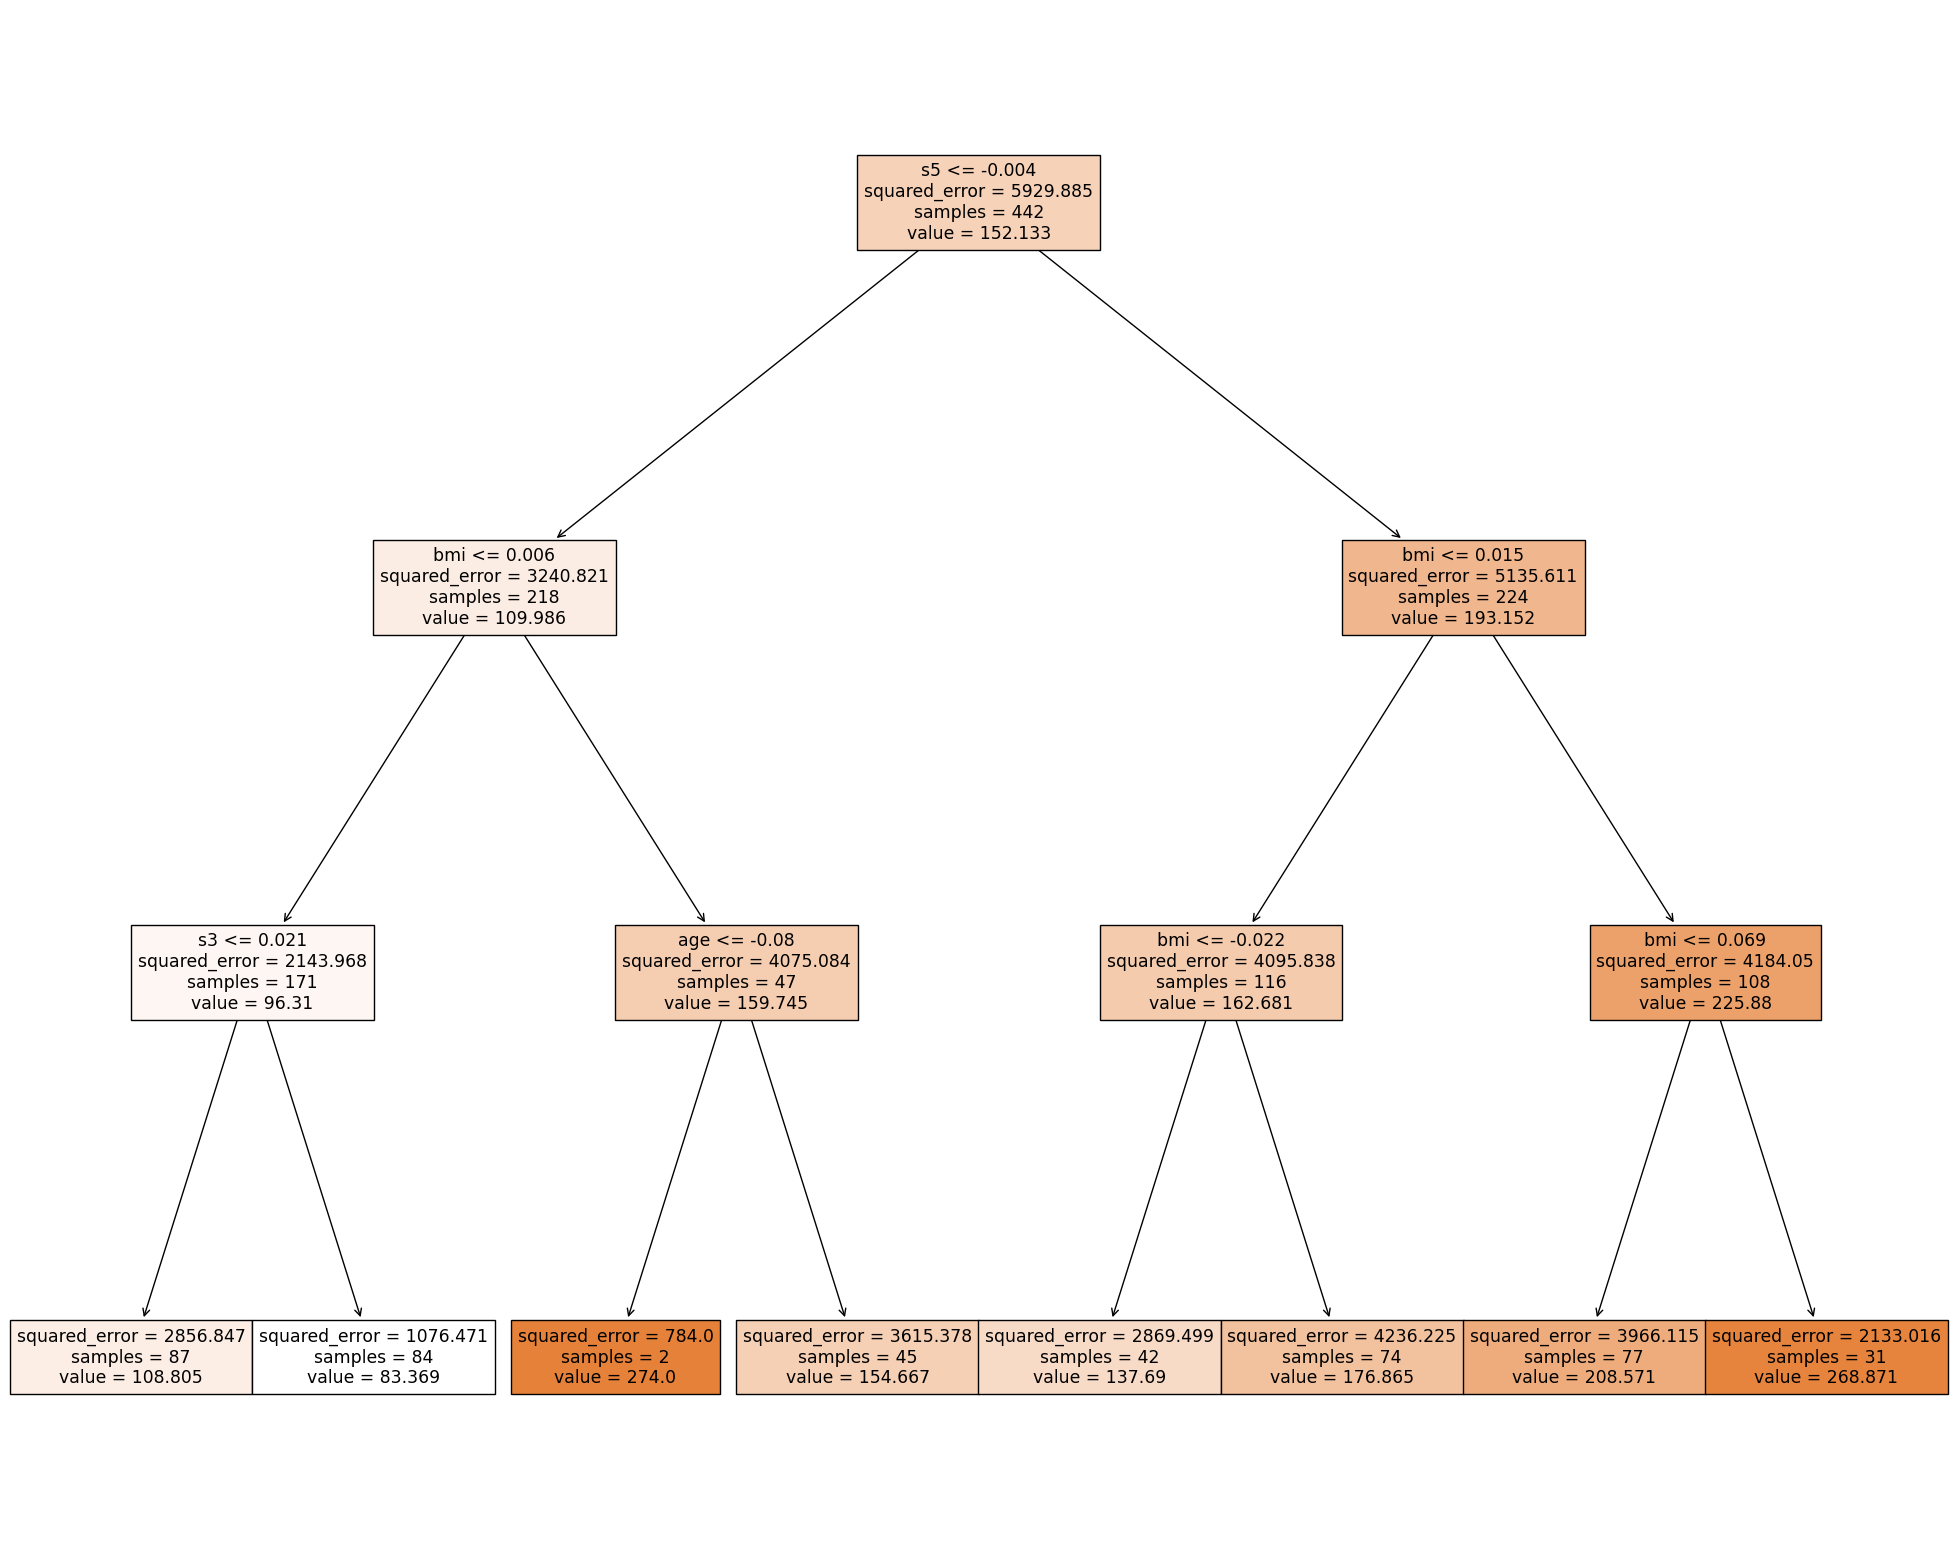

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=diab.feature_names, filled=True)

## Алгоритмы построения

**ID3** (Итеративный дихотомайзер 3) был разработан в 1986 году Россом Куинланом. 
Алгоритм создает дерево, находя для каждого узла (т. е. жадным способом) категориальный признак, который даст наибольший прирост информации. Деревья вырастают до максимального размера, а затем обычно применяется этап отсечения, чтобы улучшить способность дерева обобщать новые данные.

**C4.5** является преемником ID3 и убрал ограничение, согласно которому объекты должны быть категориальными, путем динамического определения дискретного атрибута (на основе числовых переменных), который разбивает непрерывное значение атрибута на дискретный набор интервалов. C4.5 преобразует обученные деревья (т. е. выходные данные алгоритма ID3) в наборы правил «если-то». Затем оценивается точность каждого правила, чтобы определить порядок их применения. Отсечение выполняется путем удаления предусловия правила, если точность правила улучшается без него.

**CART** (деревья классификации и регрессии) очень похож на C4.5, но отличается тем, что поддерживает числовые целевые переменные (регрессия) и не вычисляет наборы правил. CART строит бинарные деревья, используя признак и порог, которые дают наибольший прирост информации в каждом узле.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya

Алгоритм CART
Строит бинарное дерево, где в узлах находится предикат, в листах находится ответ.
Задача -- минимизировать ошибку на каждом листе.

Алгоритм обучения упрощённо можно описать следующим образом:
0. Проверяем критерий остановки
1. Строим всевозможные разбиения на две подвыборки по одному признаку
2. Выбираем лучшее разбиение
3. Возвращаемся к шагу 0 для потомков
4. Проводим отсечение (pruning)

Описание алогритма: https://scikit-learn.org/stable/modules/tree.html#mathematical-formulation

# Ансамбли
(метаалгоритмы, композиции алгоритмов)

- Бэггинг
 - Метод случайного леса (англ. random forest)
- Бустинг
 - Бустинг над решающими деревьями
- стекинг

https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

## Бэггинг

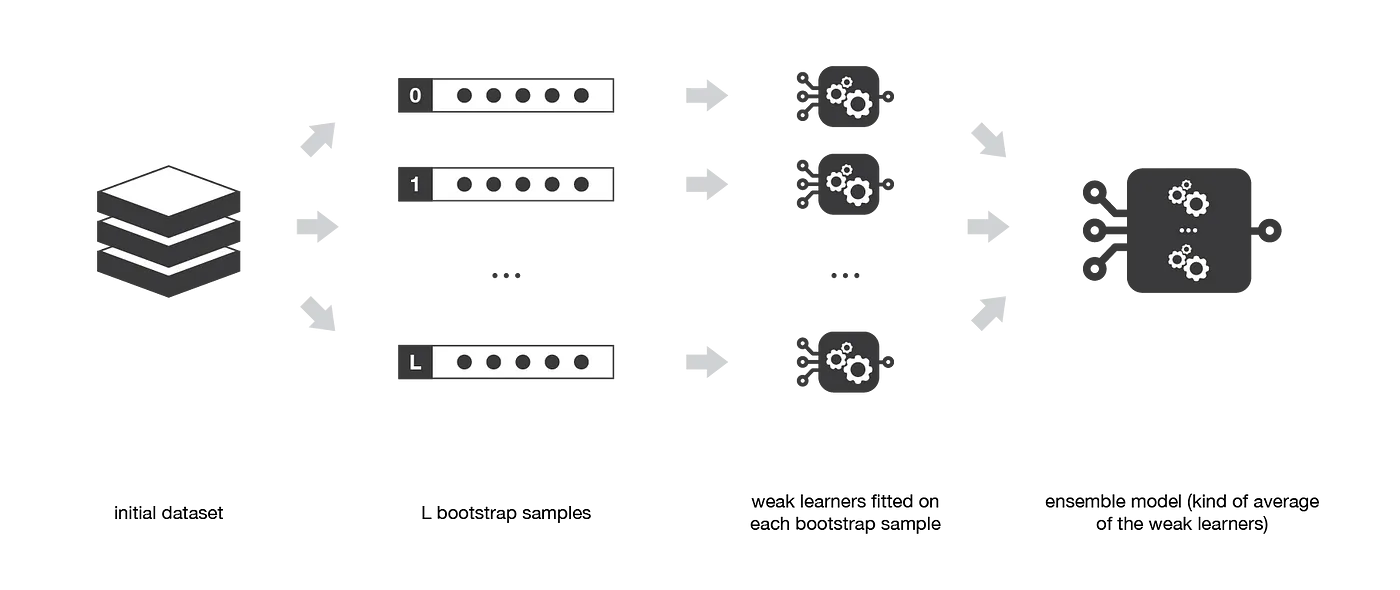

## Бустинг

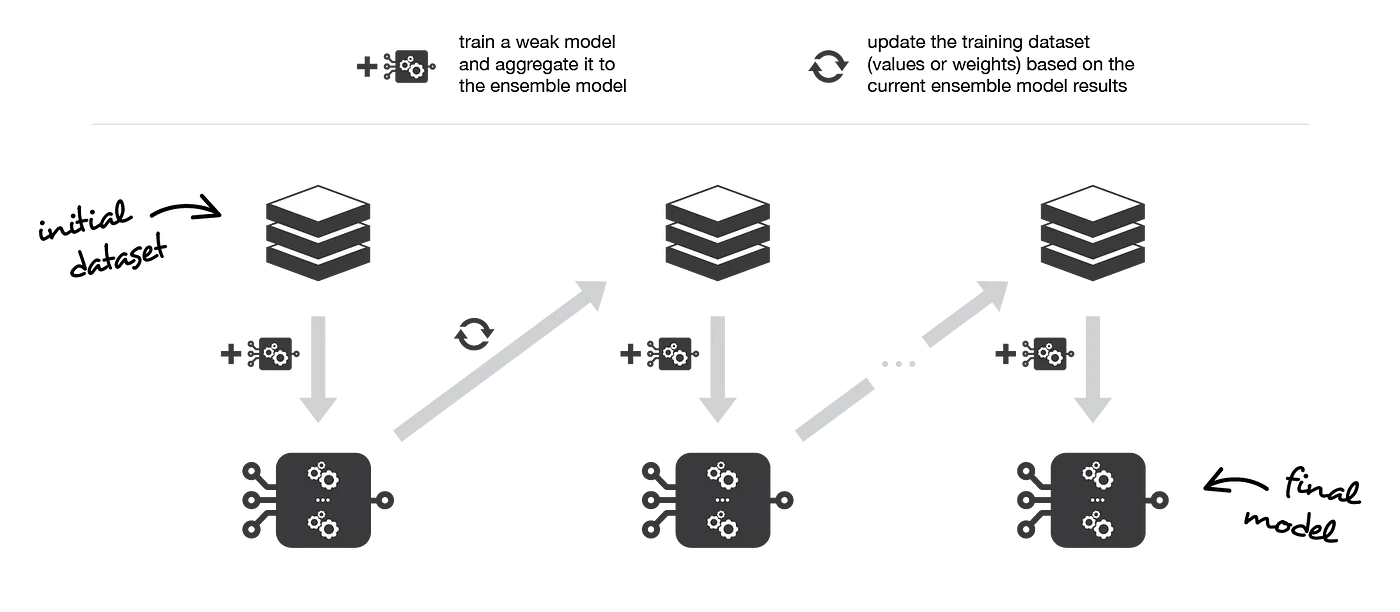

## Стекинг

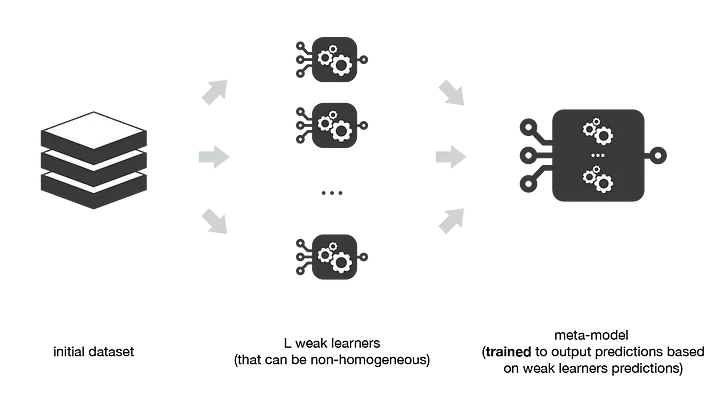

# Задание
  1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.
  2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor
  3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)
  4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации.
  5. Доп. задание: реализовать(на выбор) бустинг или бэггинг.

Не забывайте про подготовку датасетов и подбор гиперпараметров.

Доп. ссылки:

* https://www.youtube.com/watch?v=kqJ03kWuvO0
* https://academy.yandex.ru/handbook/ml/article/reshayushchiye-derevya
* https://academy.yandex.ru/handbook/ml/article/ansambli-v-mashinnom-obuchenii
* https://academy.yandex.ru/handbook/ml/article/gradientnyj-busting
* https://medium.com/@abedinia.aydin/survey-of-the-decision-trees-algorithms-cart-c4-5-id3-97df842831cd
* https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
* https://basegroup.ru/community/articles/math-cart-part1#comments

### Задание 1. Использовать DecisionTreeClassifier и DecisionTreeRegressor для наборов данных своего варианта.

In [ ]:
# Классификация
import pandas as pd
import numpy as np

df = pd.read_csv('c.csv')
X = df.drop(columns = ["Fire Alarm"])
y = df['Fire Alarm']
df

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0.0,400.0,12306.0,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,No
1,1654733332,20.015,56.67,0.0,400.0,12345.0,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,No
2,1654733333,20.029,55.96,0.0,400.0,12374.0,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,No
3,1654733334,20.044,55.28,0.0,400.0,12390.0,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,No
4,1654733335,20.059,54.69,0.0,400.0,12403.0,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,1655130047,18.438,15.79,625.0,400.0,13723.0,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,No
62626,1655130048,18.653,15.87,612.0,400.0,13731.0,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,No
62627,1655130049,18.867,15.84,627.0,400.0,13725.0,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,No
62628,1655130050,19.083,16.04,638.0,400.0,13712.0,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,No


In [ ]:
df.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.972252,48.536969,1944.124030,670.574994,12942.383835,19754.257912,938.627644,100.594309,184.443467,491.463608,203.382660,80.049042,10511.386157
std,1.100025e+05,14.344456,8.851486,7780.803394,1904.714566,272.289864,609.513156,1.330882,922.524245,1971.581818,4265.661251,2210.259493,1083.383189,7597.870997
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,11.074000,47.540000,132.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.350000,8.820000,1.392000,0.033000,3625.250000
50%,1.654762e+09,20.108500,50.120000,996.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.945000,0.044000,9336.000000
75%,1.654778e+09,25.400000,53.240000,1193.000000,439.000000,13108.000000,20078.000000,939.417000,2.090000,2.180000,14.420000,2.253000,0.051000,17164.750000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
tree_representation = tree.export_text(clf)
print(tree_representation)

|--- feature_13 <= 5742.50
|   |--- feature_5 <= 13204.50
|   |   |--- feature_7 <= 933.98
|   |   |   |--- feature_13 <= 36.50
|   |   |   |   |--- class: No
|   |   |   |--- feature_13 >  36.50
|   |   |   |   |--- class: Yes
|   |   |--- feature_7 >  933.98
|   |   |   |--- feature_2 <= 57.44
|   |   |   |   |--- feature_13 <= 3319.50
|   |   |   |   |   |--- feature_4 <= 2214.79
|   |   |   |   |   |   |--- feature_13 <= 4.50
|   |   |   |   |   |   |   |--- feature_9 <= 2.30
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- feature_9 >  2.30
|   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |--- feature_13 >  4.50
|   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- feature_4 >  2214.79
|   |   |   |   |   |   |--- class: Yes
|   |   |   |   |--- feature_13 >  3319.50
|   |   |   |   |   |--- feature_7 <= 938.56
|   |   |   |   |   |   |--- class: No
|   |   |   |   |   |--- feature_7 >  938.56
|   |   |   |   |   

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5371
         Yes       1.00      1.00      1.00     13418

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [ ]:
# Регрессия
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('r.csv')
df = df.drop(columns = ["Unnamed: 0"])
X = df.drop(columns = ["price"])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
df

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Ready to Move,Under Construction,New Property,Resale,Furnished,Semi-Furnished,Unfurnished,Flat,Individual House
0,22400000.0,629.0,19.032800,72.896357,2.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
1,35000000.0,974.0,19.032800,72.896357,3.0,2.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
2,31700000.0,968.0,19.085600,72.909277,3.0,3.0,0.0,0.0,0.0,0,1,1,0,0,0,1,1,0
3,18700000.0,629.0,19.155756,72.846862,2.0,2.0,2.0,2.0,2.0,1,0,1,0,0,0,1,1,0
4,13500000.0,1090.0,19.177555,72.849887,2.0,2.0,0.0,0.0,0.0,1,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,19500000.0,810.0,19.138320,72.810020,2.0,2.0,0.0,0.0,0.0,1,0,0,1,0,1,0,1,0
6251,22000000.0,1400.0,19.221920,72.854250,3.0,3.0,1.0,1.0,1.0,1,0,0,1,0,0,1,1,0
6252,20000000.0,750.0,19.144320,72.824111,2.0,2.0,0.0,0.0,0.0,1,0,0,1,0,0,1,1,0
6253,11000000.0,700.0,19.047201,72.872225,2.0,2.0,0.0,0.0,0.0,1,0,0,1,1,0,0,1,0


In [ ]:
df.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Ready to Move,Under Construction,New Property,Resale,Furnished,Semi-Furnished,Unfurnished,Flat,Individual House
count,6.255000e+03,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000,6255.000000
mean,2.684187e+07,1185.625260,19.156772,72.868642,2.452278,2.425580,0.821583,0.821583,0.821583,0.999520,0.000480,0.118305,0.881695,0.163229,0.191047,0.645723,0.931735,0.068265
std,2.788831e+07,636.973259,0.109447,0.058614,0.749534,0.762604,1.291957,1.291957,1.291957,0.021897,0.021897,0.322995,0.322995,0.369604,0.393158,0.478332,0.252221,0.252221
min,1.500000e+06,503.000000,18.873713,72.754080,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.300000e+07,846.500000,19.081509,72.832930,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.900000e+07,1000.000000,19.147269,72.858019,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.000000e+07,1300.000000,19.213054,72.884691,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,3.600000e+08,8000.000000,19.476239,73.197823,10.000000,10.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)
tree_representation = tree.export_text(reg)
print(tree_representation)


|--- feature_0 <= 1697.50
|   |--- feature_1 <= 19.15
|   |   |--- feature_4 <= 2.50
|   |   |   |--- feature_2 <= 72.85
|   |   |   |   |--- feature_1 <= 19.12
|   |   |   |   |   |--- feature_2 <= 72.81
|   |   |   |   |   |   |--- feature_0 <= 1065.00
|   |   |   |   |   |   |   |--- feature_1 <= 18.97
|   |   |   |   |   |   |   |   |--- feature_0 <= 775.00
|   |   |   |   |   |   |   |   |   |--- feature_16 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 72.80
|   |   |   |   |   |   |   |   |   |   |   |--- value: [31500000.00]
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  72.80
|   |   |   |   |   |   |   |   |   |   |   |--- value: [35000000.00]
|   |   |   |   |   |   |   |   |   |--- feature_16 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- value: [45000000.00]
|   |   |   |   |   |   |   |   |--- feature_0 >  775.00
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 18.95
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 2.50
| 

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_pred = reg.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(f'{(mean_absolute_error(y_pred,y_test)/np.mean(y)*100)*1000//10/100}%')

194328741194.57764
58203.693837684244
0.21%


### Задание 2. Использовать [ансамбли](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble) для наборов данных своего варианта:
    - BaggingClassifier
    - BaggingRegressor
    - GradientBoostingClassifier
    - GradientBoostingRegressor
    - StackingClassifier
    - StackingRegressor

In [111]:
#Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('c.csv')
X = df.drop(columns = ['Fire Alarm'])
y = df["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = BaggingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5412
         Yes       1.00      1.00      1.00     13377

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [128]:
#Bagging Regression
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('r.csv')
df = df.drop(columns = ["Unnamed: 0"])
X = df.drop(columns = ["price"])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = BaggingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


6405090.303676079


In [120]:
#Gradient Boostinng Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('c.csv')
X = df.drop(columns = ['Fire Alarm'])
y = df["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5388
         Yes       1.00      1.00      1.00     13401

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [127]:
#Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('r.csv')
df = df.drop(columns = ["Unnamed: 0"])
X = df.drop(columns = ["price"])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = GradientBoostingRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


6894685.422683736


In [125]:
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

df = pd.read_csv('c.csv')
X = df.drop(columns = ['Fire Alarm'])
y = df["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
estimators = [
    ('rf',RandomForestClassifier(n_estimators=10)),
    ('svr',LinearSVC())
]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\ml\venv\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5363
         Yes       1.00      1.00      1.00     13426

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [131]:
#Stacking Regression
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('r.csv')
df = df.drop(columns = ["Unnamed: 0"])
X = df.drop(columns = ["price"])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

estimators = [
    ('svr', LinearSVR()),
    ('lr', RidgeCV())
]

reg = StackingRegressor(
    estimators=estimators, 
    final_estimator=RandomForestRegressor(n_estimators=10)
)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(mean_absolute_error(y_test, y_pred))


8512799.918816755


### Задание 3. Попробовать для решения задачи регрессии и классификации одну из библиотек (на выбор): 
    - [Catboost](https://catboost.ai/en/docs/concepts/python-usages-examples), 
    - [XGBoost](https://xgboost.readthedocs.io/en/stable/get_started.html), 
    - [LightGBM](https://github.com/microsoft/LightGBM/blob/master/examples/python-guide/simple_example.py)

In [136]:
#Catbooster Classifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv('c.csv')
X = df.drop(columns = ['Fire Alarm'])
y = df["Fire Alarm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = CatBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


Learning rate set to 0.051763
0:	learn: 0.5141528	total: 10.2ms	remaining: 10.2s
1:	learn: 0.3772424	total: 21.2ms	remaining: 10.6s
2:	learn: 0.2740667	total: 34ms	remaining: 11.3s
3:	learn: 0.1949667	total: 44ms	remaining: 11s
4:	learn: 0.1418776	total: 54.3ms	remaining: 10.8s
5:	learn: 0.1054679	total: 65.8ms	remaining: 10.9s
6:	learn: 0.0785559	total: 75.2ms	remaining: 10.7s
7:	learn: 0.0585351	total: 86.7ms	remaining: 10.7s
8:	learn: 0.0452055	total: 97.7ms	remaining: 10.8s
9:	learn: 0.0356814	total: 108ms	remaining: 10.7s
10:	learn: 0.0277064	total: 118ms	remaining: 10.6s
11:	learn: 0.0227117	total: 128ms	remaining: 10.6s
12:	learn: 0.0187407	total: 140ms	remaining: 10.6s
13:	learn: 0.0150827	total: 154ms	remaining: 10.8s
14:	learn: 0.0125008	total: 201ms	remaining: 13.2s
15:	learn: 0.0106098	total: 219ms	remaining: 13.5s
16:	learn: 0.0092695	total: 245ms	remaining: 14.2s
17:	learn: 0.0081604	total: 262ms	remaining: 14.3s
18:	learn: 0.0070887	total: 286ms	remaining: 14.7s
19:	lear

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5364
         Yes       1.00      1.00      1.00     13425

    accuracy                           1.00     18789
   macro avg       1.00      1.00      1.00     18789
weighted avg       1.00      1.00      1.00     18789



In [137]:
#CatBoost Regression
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df = pd.read_csv('r.csv')
df = df.drop(columns = ["Unnamed: 0"])
X = df.drop(columns = ["price"])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg = CatBoostRegressor()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


Learning rate set to 0.051701
0:	learn: 27195660.0621761	total: 3.46ms	remaining: 3.46s
1:	learn: 26486830.6495456	total: 6.24ms	remaining: 3.12s
2:	learn: 25660754.1625592	total: 9.07ms	remaining: 3.01s
3:	learn: 24892692.3894195	total: 12.2ms	remaining: 3.05s
4:	learn: 24229105.2342840	total: 14.8ms	remaining: 2.95s
5:	learn: 23566946.4248971	total: 19.1ms	remaining: 3.16s
6:	learn: 22960993.5768960	total: 50.6ms	remaining: 7.18s
7:	learn: 22382319.4424346	total: 56.9ms	remaining: 7.05s
8:	learn: 21829792.1209088	total: 66.9ms	remaining: 7.37s
9:	learn: 21274524.1868495	total: 74.8ms	remaining: 7.4s
10:	learn: 20762216.4597292	total: 80.2ms	remaining: 7.21s
11:	learn: 20321276.3149339	total: 86.2ms	remaining: 7.1s
12:	learn: 19861243.1565313	total: 90.6ms	remaining: 6.88s
13:	learn: 19459413.2541313	total: 94.1ms	remaining: 6.63s
14:	learn: 19071831.7844895	total: 98.5ms	remaining: 6.47s
15:	learn: 18697510.7619277	total: 103ms	remaining: 6.31s
16:	learn: 18297796.1340850	total: 106m

In [139]:
print(mean_absolute_error(y_test, y_pred))

6025985.1932362355


### Задание 4. Реализовать обучения и вычисления дерева с использованием алгоритма CART для задачи регрессии и классификации. 

In [2]:
class CART:

    def __init__(self):
        self.classes = None
        self.root = {'children' : [None, None], # 1. Доступ к узлам
                     'count_of_classes': None,  # 2. Список количества каждого класса. Пример [30, 20, 50]
                     'X': None,                 # 3. Выборка X
                     'y': None,                 # 4. Выборка y
                     'Attribute': None,         # 5. По какому признаку первое распределение выборки
                     'Threshold': None          # 6. Значение порога
        }                                                      
                                                             
    def left_node_maker(self, X, y, attr, threshold):
        if len(X) == 0:
            return None
        X, y = X[X[attr] <= threshold], y[X[attr] <= threshold]
        count_of_classes = y.value_counts().sort_index()
        label = count_of_classes.idxmax()
        return {'children': [None, None], 
                'count_of_classes': count_of_classes, 
                'X': X, 
                'y': y, 
                'Attribute': attr,
                'Threshold': threshold,
                'label': label
               }
    
    def right_node_maker(self, X, y, attr, threshold):
        if len(X) == 0:
            return None
        X, y = X[X[attr] > threshold], y[X[attr] > threshold]
        count_of_classes = y.value_counts().sort_index()
        label = count_of_classes.idxmax()
        return {'children': [None, None], 
                'count_of_classes': count_of_classes, 
                'X': X, 
                'y': y, 
                'Attribute': attr,
                'Threshold': threshold,
                'label': label
               }
    
    def fit(self, X, y, depth = 1):
        self.root['X'] = X
        self.root['y'] = y
        self.root['count_of_classes'] = y.value_counts().sort_index()
        queue = [self.root]

        for d in range(depth):
            size = len(queue)
            for i in range(size):
                node = queue.pop(0)
                attr, threshold = self.best_params(node['X'], node['y'])
                node['Attribute'] = attr
                node['Threshold'] = threshold

                left = self.left_node_maker(X, y, attr, threshold)
                right = self.right_node_maker(X, y, attr, threshold)

                node['children'][0] = left
                node['children'][1] = right

                queue.append(left)
                queue.append(right)
    
    def best_params(self, X, y):
        return X.columns[1], X[X.columns[1]].mean()
    
    def predict(self, X):
        pred = []
        for i in range(len(X)):
            node = self.root
            while True:
                if node['children'][0] != None and node['children'][1] != None:
                    if X[node['Attribute']].iloc[i] > node['Threshold']:
                        node = node['children'][1]
                    if X[node['Attribute']].iloc[i] <= node['Threshold']:
                        node = node['children'][0]
                if node['children'][0] != None and node['children'][1] == None:
                    node = node['children'][0]
                if node['children'][0] == None and node['children'][1] != None:
                    node = node['children'][1]
                if node['children'][0] == None and node['children'][1] == None:
                    pred.append(node['label'])
                    break
        return pred


In [2]:
import numpy as np
import pandas as pd

class CART:

    def __init__(self, data, target):
        self.data = data
        self.target = target
        self.features = data.columns
        self.classes = np.unique(target)
        self.root = None

    def fit(self):
        self.root = self._build_tree(self.data, self.target, self.features, self.classes)

    def predict(self, data):
        predictions = []
        for row in data:
            predictions.append(self._predict_row(row, self.root))
        return predictions

    def _build_tree(self, data, target, features, classes):
        if len(data) == 0:
            return None

        # Find the best split
        best_feature, best_threshold = self._find_best_split(data, target, features)

        # If there is no best split, return a leaf node
        if best_feature is None:
            return Node(classes[np.argmax(np.bincount(target))])

        # Create a new node
        new_node = Node()
        new_node.feature = best_feature
        new_node.threshold = best_threshold

        # Split the data
        left_data = data[data[best_feature] <= best_threshold]
        right_data = data[data[best_feature] > best_threshold]

        # Recursively build the left and right subtrees
        new_node.left = self._build_tree(left_data, target, features, classes)
        new_node.right = self._build_tree(right_data, target, features, classes)

        return new_node

    def _find_best_split(self, data, target, features):
        best_gini = float("inf")
        best_feature = None
        best_threshold = None

        for feature in features:
            for threshold in np.unique(data[feature]):
                # Calculate the gini impurity of the split
                gini = self._gini_impurity(data, target, feature, threshold)

                # If the gini impurity is less than the best gini impurity, update the best split
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _gini_impurity(self, data, target, feature, threshold):
        # Calculate the probability of each class
        class_probabilities = np.bincount(target) / len(target)

        # Calculate the weighted gini impurity
        gini = 0
        for class_probability in class_probabilities:
            gini += class_probability * (1 - class_probability)

        return gini


class Node:

    def __init__(self, label=None):
        self.label = label
        self.left = None
        self.right = None

    def predict(self, row):
        if self.label is not None:
            return self.label

        if row[self.feature] <= self.threshold:
            return self.left.predict(row)
        else:
            return self.right.predict(row)

In [10]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('c.csv')
X = df.drop(columns = ['Fire Alarm'])
y = df["Fire Alarm"]
y.replace({'Yes':1, 'No':0}, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = CART(X, y)
clf.fit()
y_pred = clf.predict(X_test)
accuracy = np.mean(y_pred == y)
print('Accuracy = ',accuracy)


: 

: 